Name : Asish Kakumanu <br/>
UB Person No. : 50288695 <br/>
UBIT Name : asishkak <br/>

---

###### Teammate 

Name : Swapnika P <br/>
UB Person No. : 50289464 <br/>
UBIT Name : swapnika <br/>

# PART-2

In [1]:
#installing the required packages for plot
install.packages("ggplot2")
install.packages("maptools")
install.packages("ggmap")

Installing package into 'C:/Users/pswap/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pswap\AppData\Local\Temp\Rtmp4mDu2A\downloaded_packages


Installing package into 'C:/Users/pswap/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'maptools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'maptools'"


The downloaded binary packages are in
	C:\Users\pswap\AppData\Local\Temp\Rtmp4mDu2A\downloaded_packages


Installing package into 'C:/Users/pswap/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pswap\AppData\Local\Temp\Rtmp4mDu2A\downloaded_packages


# PART 2, TASK 4

# Plot 1- Influenza national summary

In [2]:
library(ggplot2)
#provides variety of methods for transforming data before analysis
library(reshape2)
infl <- read.csv("1.csv",header=T)
#melt-used to transform data such that each row is unique id-variable combination
melted_infl <- melt(infl,id=c("Week"))

Warning message:
"package 'reshape2' was built under R version 3.5.2"

In [3]:
#options()-used to set various parameters that affects the way in which results are displayed(dimensions)
options(repr.plot.width=15, repr.plot.height=8)

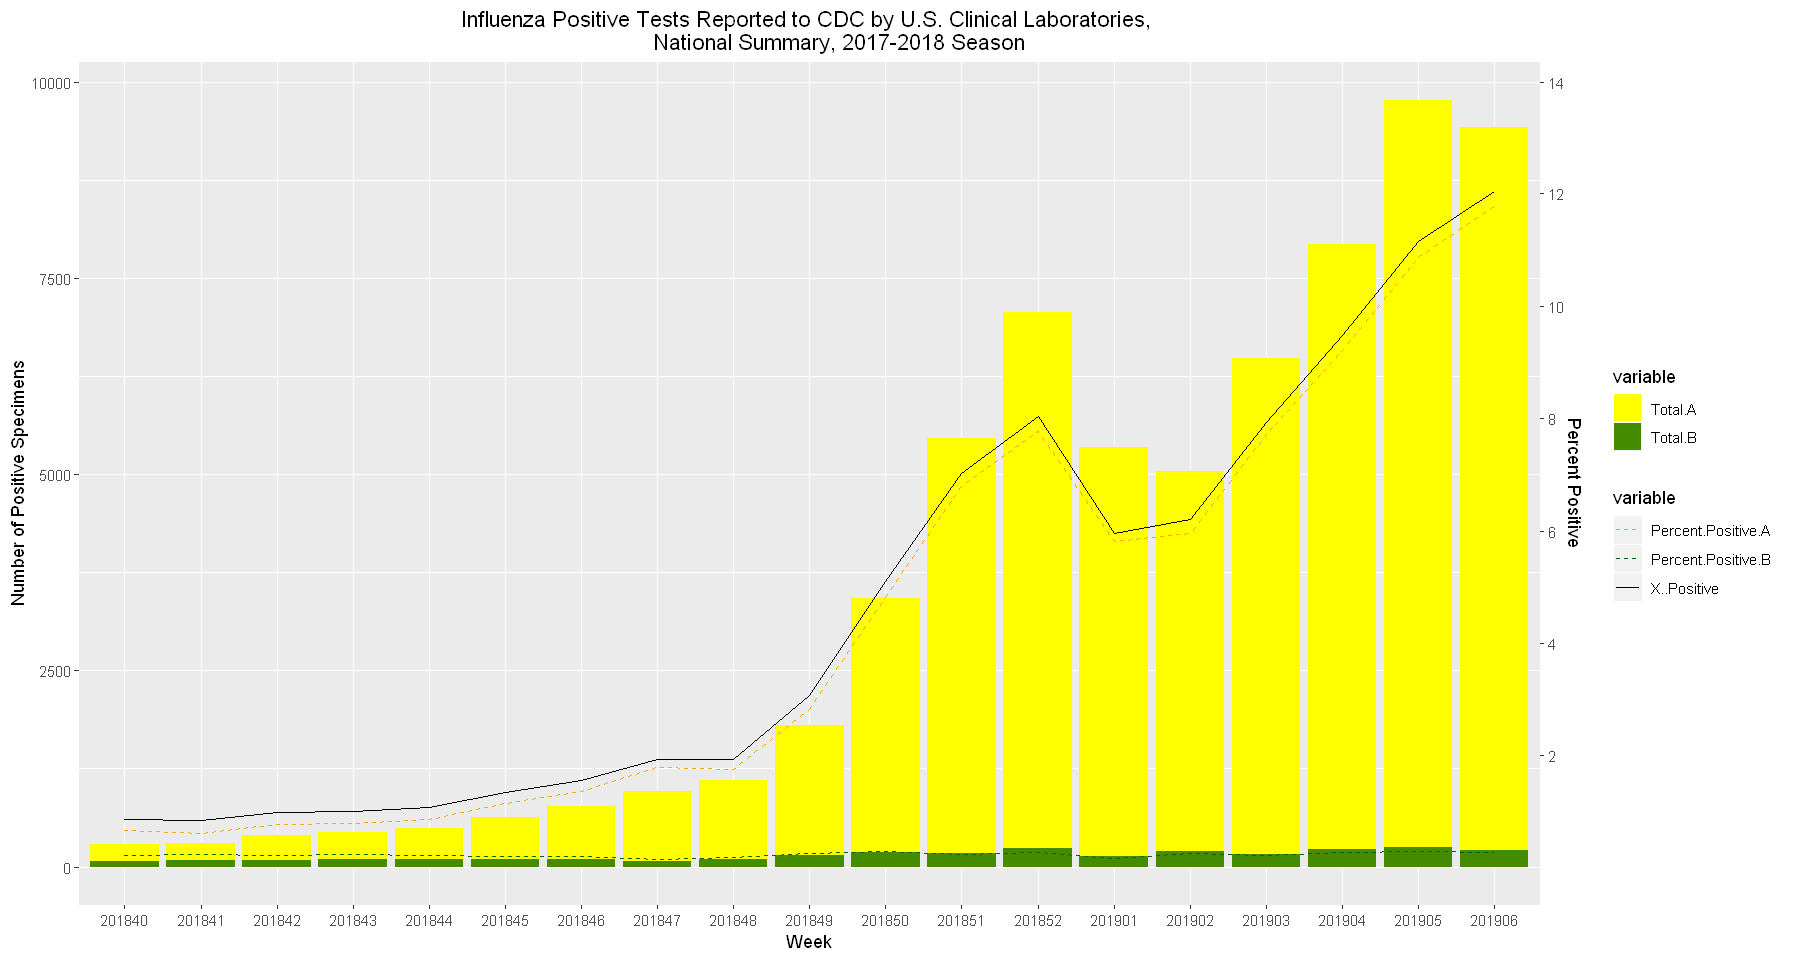

In [4]:
#ggplot()-Create Elegant Data Visualisations Using graphs and plots
#geom_bar()-used to produce plots(barchart) for categorical data
#subset()-for selecting set of data or variables with some conditions, %in%-selecting particular values or storing data or used for comparison
#aes()-describes how variables in data are mapped,names of the variables from data frame can be passed directly
#stat="identity"-used when heights of bars need to represent values in data 
#scale_fill_manual-to change or set colours manually
#scale_linetype_manual-to set the type of line(used for setting discrete scale)
#factor()-storing data as factors insures that the modeling functions will treat non-continuous data correctly,stored as vector of values
#breaks-breakpoints made in the plot
#seq()-displays range of values from and to with gap specified by parameter "by" 
#labs-give labels for x and y-axis
#theme()-used to customize the non-data components of your plots
ggplot()+ 
geom_bar(data=subset(melted_infl,variable %in% c("Total.A","Total.B")),aes(x=factor(Week),y=value,fill=variable),stat="identity")+
scale_fill_manual(values=c("Total.A" = "yellow", "Total.B" = "chartreuse4"))+
geom_line(data=subset(melted_infl, variable %in% c("Percent.Positive.A","Percent.Positive.B","X..Positive")),
            aes(x=factor(Week),y=value*350,group=variable,colour=variable,linetype=variable))+
scale_colour_manual(values=c("Percent.Positive.A" = "orange", "Percent.Positive.B" = "darkgreen","X..Positive" = "black"))+
scale_linetype_manual(values=c("Percent.Positive.A" = "dashed", "Percent.Positive.B" = "dashed","X..Positive" = "solid"))+
scale_y_continuous(sec.axis = sec_axis(~.*0.0014, name = "Percent Positive",breaks = round(seq(2, 30, by = 2),1)))+
labs(x="Week",y="Number of Positive Specimens")+ ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2017-2018 Season")+theme(plot.title = element_text(hjust = 0.5))

# Plot 2-Positive tested

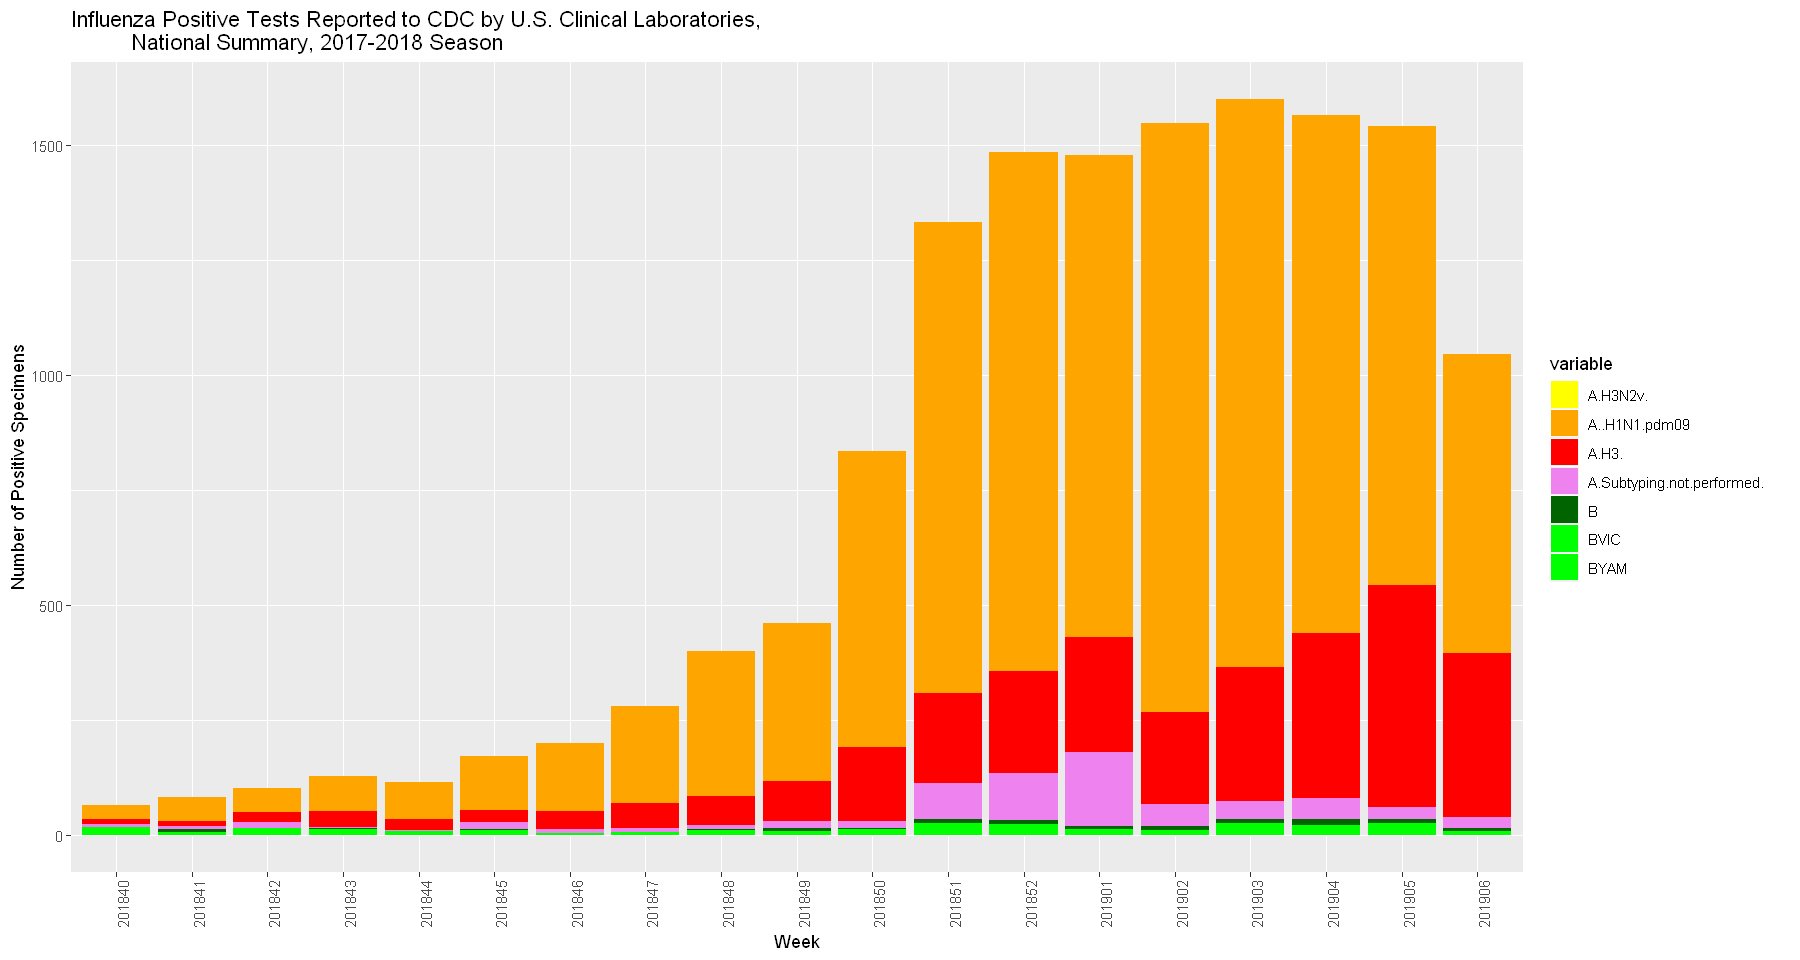

In [5]:
library(ggplot2)
library (reshape2)

data_plot_2 <- read.csv("2.csv", header=TRUE)
data_plot_2 <- subset( data_plot_2, select = -c(5, 10 ))
data_plot_2_melt <- melt(data_plot_2,id=c("Week"))

#aes()-describes how variables in data are mapped,names of the variables from data frame can be passed directly
#stat="identity"-used when heights of bars need to represent values in data 
#scale_fill_manual-to change or set colours manually

ggplot()+
  geom_bar(data=data_plot_2_melt,aes(x=factor(Week),y=value,fill=variable),stat="identity")+
  scale_fill_manual(values = c("yellow","orange","red","violet","darkgreen","green1","green" ))+
  labs(x="Week",y="Number of Positive Specimens")+
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2017-2018 Season")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Plot 3-Influenza sub-type pie-charts 

In [6]:
pie2<-function (x, labels = names(x), edges = 200, radius = 0.8, clockwise = FALSE, 
    init.angle = if (clockwise) 90 else 0, density = NULL, angle = 45, 
    col = NULL, border = NULL, lty = NULL, main = NULL, ...) 
{
    if (!is.numeric(x) || any(is.na(x) | x < 0)) 
        stop("'x' values must be positive.")
    if (is.null(labels)) 
        labels <- as.character(seq_along(x))
    else labels <- as.graphicsAnnot(labels)
    x <- c(0, cumsum(x)/sum(x))
    dx <- diff(x)
    nx <- length(dx)
    plot.new()
    pin <- par("pin")
    xlim <- ylim <- c(-1, 1)
    if (pin[1L] > pin[2L]) 
        xlim <- (pin[1L]/pin[2L]) * xlim
    else ylim <- (pin[2L]/pin[1L]) * ylim
    dev.hold()
    on.exit(dev.flush())
    plot.window(xlim, ylim, "", asp = 1)
    if (is.null(col)) 
        col <- if (is.null(density)) 
            c("white", "lightblue", "mistyrose", "lightcyan", 
                "lavender", "cornsilk")
        else par("fg")
    if (!is.null(col)) 
        col <- rep_len(col, nx)
    if (!is.null(border)) 
        border <- rep_len(border, nx)
    if (!is.null(lty)) 
        lty <- rep_len(lty, nx)
    angle <- rep(angle, nx)
    if (!is.null(density)) 
        density <- rep_len(density, nx)
    twopi <- if (clockwise) 
        -2 * pi
    else 2 * pi
    t2xy <- function(t) {
        t2p <- twopi * t + init.angle * pi/180
        list(x = radius * cos(t2p), y = radius * sin(t2p))
    }
    for (i in 1L:nx) {
        n <- max(2, floor(edges * dx[i]))
        P <- t2xy(seq.int(x[i], x[i + 1], length.out = n))
        polygon(c(P$x, 0), c(P$y, 0), density = density[i], angle = angle[i], 
            border = border[i], col = col[i], lty = lty[i])
        P <- t2xy(mean(x[i + 0:1]))
        lab <- as.character(labels[i])
        if (!is.na(lab) && nzchar(lab)) {
            lines(c(1,3) * P$x, c(1,1.3) * P$y)
            text(3 * P$x, 1.3* P$y, labels[i], xpd = TRUE, 
                adj = ifelse(P$x < 0, 1, 0), ...)
        }
    }
    title(main = main, ...)
    invisible(NULL)
}


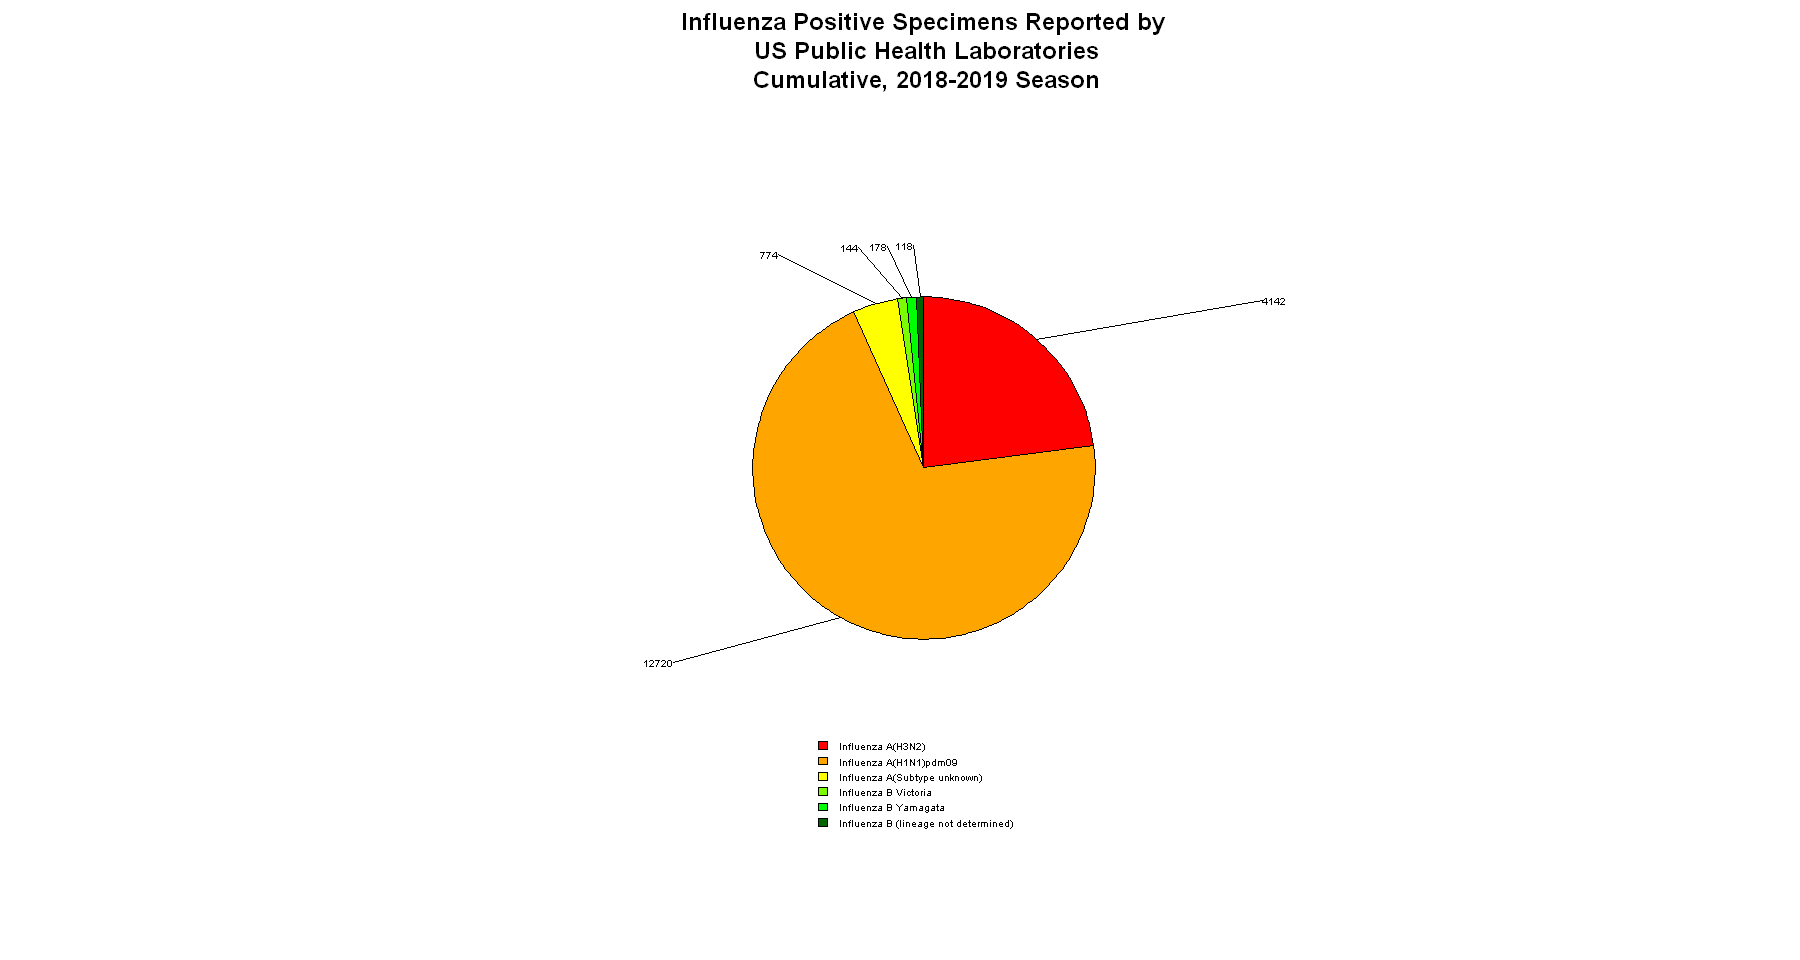

In [7]:
#pie chart for influenza specimens
leftMainChartData <- c(4142,12720,774,144,178,118)
chartlabel <-c("4142","12720","774","144","178","118")
chartlabel<-paste(chartlabel)
label <- c("Influenza A(H3N2)","Influenza A(H1N1)pdm09","Influenza A(Subtype unknown)","Influenza B Victoria","Influenza B Yamagata","Influenza B (lineage not determined)")
colors <- c("red","orange","yellow","lawngreen","green","darkgreen")
#df = data.frame(leftMainChartData,label)
#pie-pie chart is created using pie() function which takes positive numbers as a vector input and some additional parameters
dp <-pie2(leftMainChartData,labels=chartlabel,clockwise=TRUE,col=colors,radius=0.5,cex=0.5,main="Influenza Positive Specimens Reported by\n US Public Health Laboratories\n Cumulative, 2018-2019 Season")
#legend function is used to add legend to the plot 
#cex-used for adjusting the size of the text in the legend
#bty-type of box drawn around legend
legend("bottom",label,cex=0.5,fill=colors,bty="n")


In [8]:
df3 <- read.csv("3.csv")
df3

X.Sub.type,B.Lineage,Sequence.Genetic.Group,Distinct.count.of.Cdc.Id..,X..of.Total.Distinct.count.of.Cdc.Id..
B,Victoria,V1A,16,28.1%
,,V1A.1,37,64.9%
,,V1A-3DEL,4,7.0%
,Yamagata,Y3,86,100.0%
H1pdm09,,6B.1,690,100.0%
H3,,3C.2a,64,15.1%
,,3C.2a1,126,29.6%
,,3C.3a,235,55.3%


In [9]:
AH3N2 <- df3[c(6:8),]
AH1N1 <- df3[5,]
victoria <- df3[c(1:3),]
yamagata <- df3[4,]

Installing package into 'C:/Users/pswap/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pswap\AppData\Local\Temp\Rtmp4mDu2A\downloaded_packages


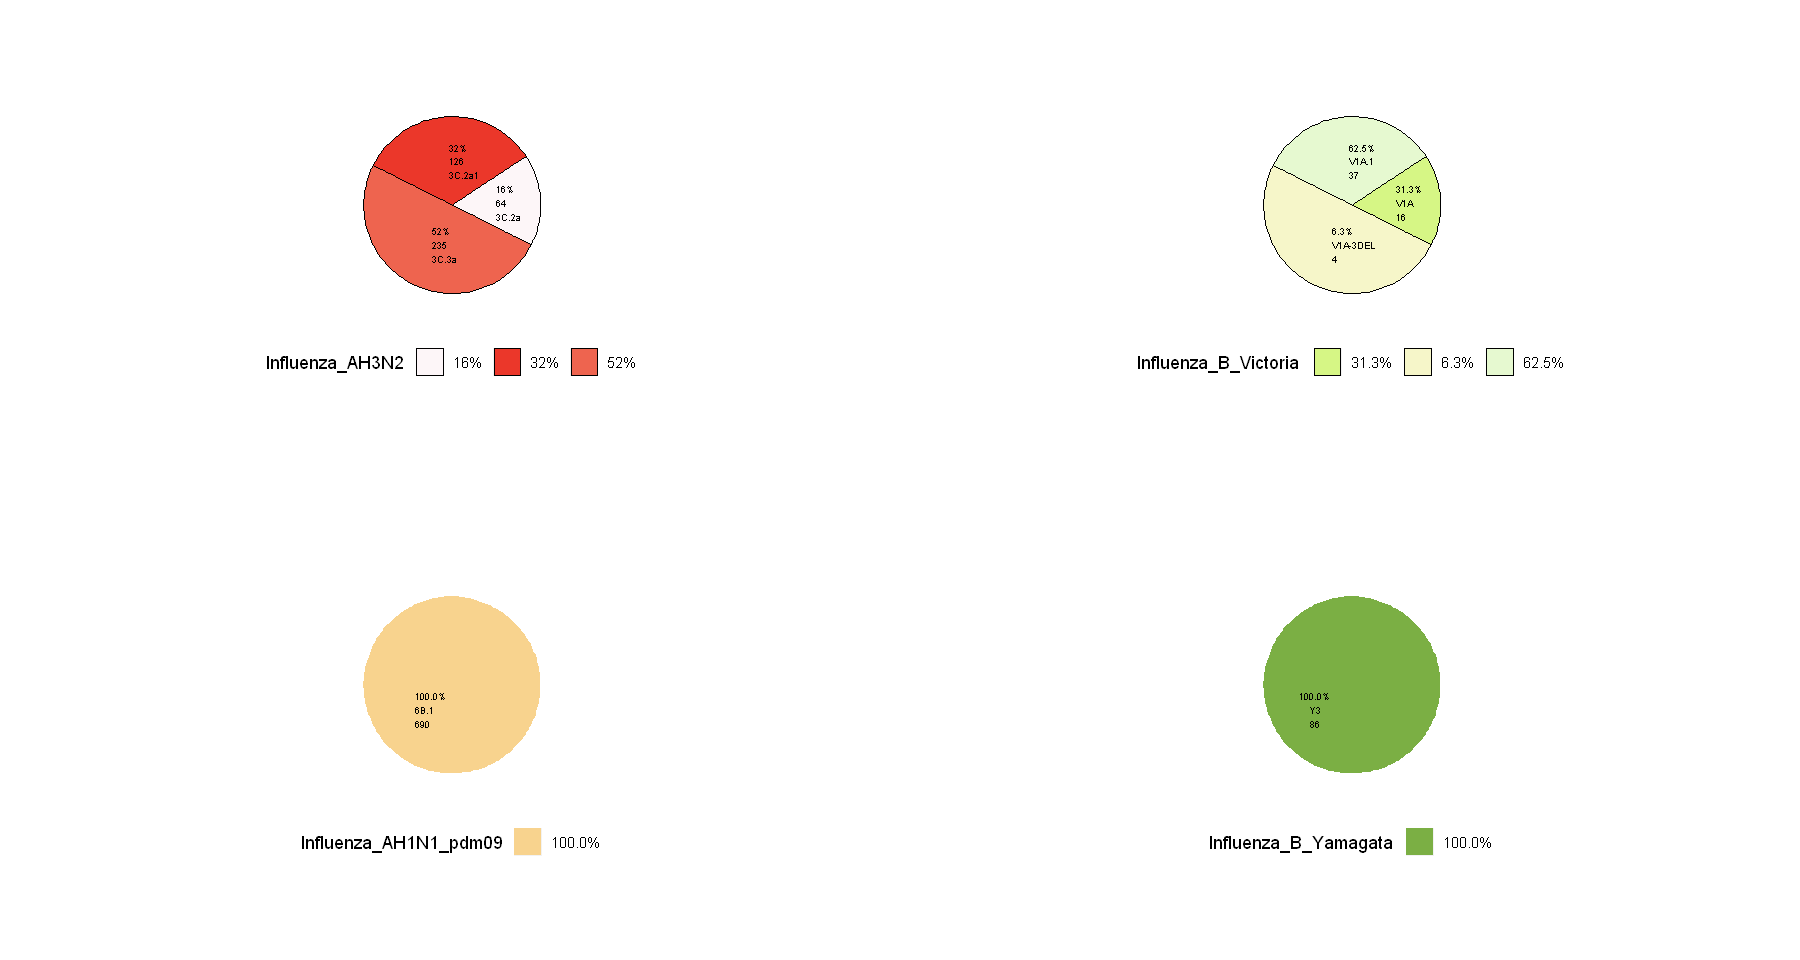

In [10]:
install.packages("ggpubr")
#ggpubr-provides some easy-to-use functions for creating and customizing 'ggplot2'- based publication ready plots.
library("gridExtra")


# Graph 1
AH3N2_data <- AH3N2[,5]
Influenza_AH3N2 <- c("16%","32%","52%")
label1a<- c("16%","32%","52%")
label1b<-c("64","126","235")
label1c<-c("3C.2a","3C.2a1","3C.3a")
label1<-paste(label1a,label1b,label1c,sep="\n")
#data frame-list of vectors used for storing values
dat1 <- data.frame(AH3N2_data,Influenza_AH3N2)
#aes-creates a list of unevaluated expressions and also performs partial name matching
bp1 <- ggplot(dat1,aes(x="",y=AH3N2_data,fill=Influenza_AH3N2))+geom_bar(width = 1, stat = "identity",col="black") 
#scale_fill_manual-to change or set colours manually
pie1 <- bp1 + coord_polar("y",start=90)
#color codes
pie1 <- pie1 + scale_fill_manual(values=c("#FDF6F8","#EB372A","#EE644F"))
#theme()-used to customize some components like title,labels,fonts,legend
pie1 <- pie1 + theme(legend.position = "bottom") +theme(
    axis.text = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
    panel.background = element_blank()
  )+theme(plot.margin = unit(c(2,2,2,2),"cm"))

pie1 <- pie1 + geom_text(aes(label = label1),hjust=0,position = position_stack(vjust = 0.5),size=2)


# Graph 2
victoria_data <- victoria[,5]
Influenza_B_Victoria <- c("31.3%","62.5%","6.3%")
label2a<-c("31.3%","62.5%","6.3%")
label2b<-c("V1A","V1A.1","V1A-3DEL")
label2c<-c("16","37","4")
label2<-paste(label2a,label2b,label2c,sep="\n")
dat2 <- data.frame(victoria_data,Influenza_B_Victoria)
bp2 <- ggplot(dat2,aes(x="",y=victoria_data,fill=Influenza_B_Victoria))+geom_bar(width = 1, stat = "identity",col="black") 
pie2 <- bp2 + coord_polar("y",start=90)
pie2 <- pie2 + scale_fill_manual(values=c("#D6F685","#F6F6C9","#E6F9D0"))
pie2 <- pie2 + theme(legend.position = "bottom") +theme(
    axis.text = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
    panel.background = element_blank()
  )+theme(plot.margin = unit(c(2,2,2,2),"cm"))

pie2 <- pie2 + geom_text(aes(x=1,label = label2),hjust=0,position = position_stack(vjust = 0.5),angle=0,size=2)





# Graph 3
Influenza_AH1N1_pdm09 <- AH1N1[,5]
label3a<-AH1N1[,5]
label3b<-c("6B.1")
label3c<-c("690")
label3<-paste(label3a,label3b,label3c,sep="\n")
dat3 <- data.frame(Influenza_AH1N1_pdm09,labels=AH3N2_data)
bp3 <- ggplot(dat3,aes(x="",y=Influenza_AH1N1_pdm09,fill=Influenza_AH1N1_pdm09))+geom_bar(width = 1, stat = "identity") 
pie3 <- bp3 + coord_polar("y",start=90)
pie3 <- pie3 + scale_fill_manual(values=c("#F8D38E"))
pie3 <- pie3 + theme(legend.position = "bottom") +theme(
    axis.text = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
    panel.background = element_blank()
  )+theme(plot.margin = unit(c(2,2,2,2),"cm"))

pie3 <- pie3 + geom_text(aes(x=1,label = label3),hjust=0,angle=0,size=2)

# Graph 4
Influenza_B_Yamagata <- yamagata[,5]
label4a<-yamagata[,5]
label4b<-c("Y3")
label4c<-c("86")
label4<-paste(label4a,label4b,label4c,sep="\n")
dat4 <- data.frame(Influenza_B_Yamagata,labels=AH3N2_data)
bp4 <- ggplot(dat4,aes(x="",y=Influenza_B_Yamagata,fill=Influenza_B_Yamagata))+geom_bar(width = 1, stat = "identity") 
pie4 <- bp4 + coord_polar("y",start=90)
pie4 <- pie4 + scale_fill_manual(values=c("#7BAF44"))
pie4 <- pie4 + theme(legend.position = "bottom") +theme(
    axis.text = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold"),
    panel.background = element_blank()
  )+theme(plot.margin = unit(c(2,2,2,2),"cm"))

pie4 <- pie4 + geom_text(aes(x=1,label = label4),angle=0,size=2)

piesub<-grid.arrange(pie1, pie2, pie3, pie4,
             ncol = 2, nrow = 2)


# Plot 4-Pediatric deaths

In [11]:
library("ggplot2")
library("reshape2")

data_plot_4<-read.csv("4.csv", header=TRUE)
data_plot_4_melt<-melt(data_plot_4,id=c("WEEK.NUMBER","SEASON")) 

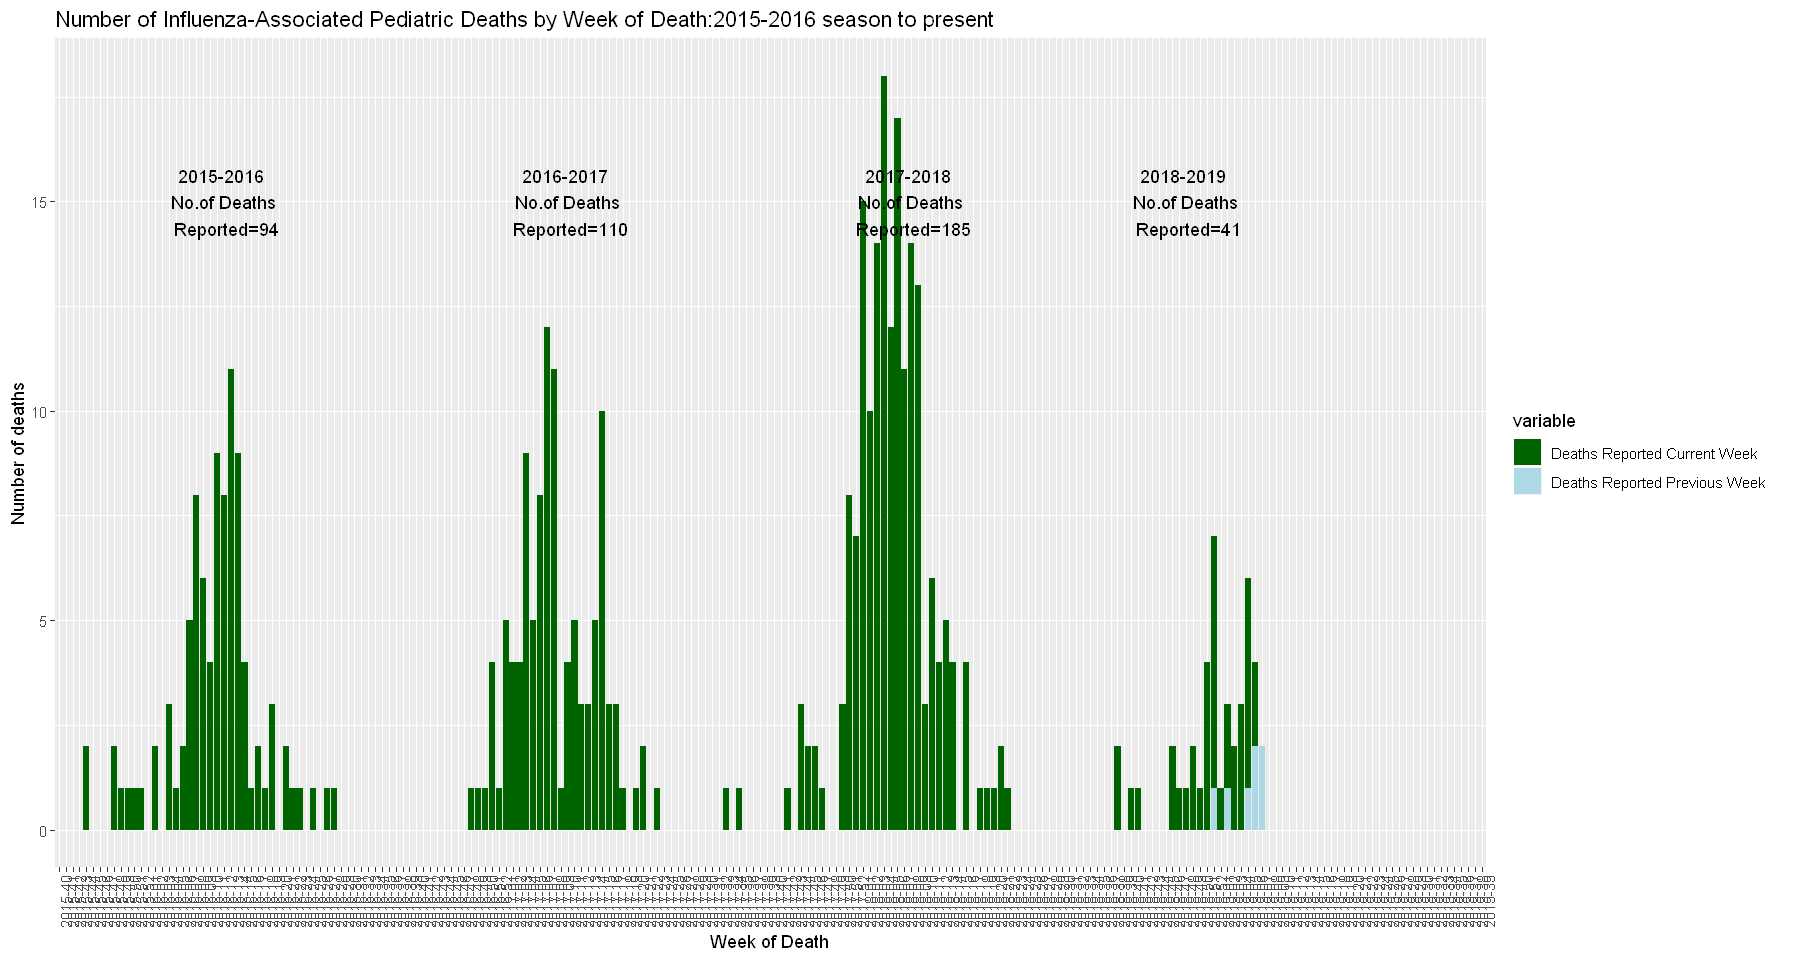

In [12]:
ggplot() +
geom_bar(data=subset(data_plot_4_melt,variable %in% c("PREVIOUS.WEEK.DEATHS","CURRENT.WEEK.DEATHS")),aes(x=factor(WEEK.NUMBER),y=value,fill=variable),stat="identity")+
scale_fill_manual(values=c("darkgreen","lightblue"),labels=c("Deaths Reported Current Week","Deaths Reported Previous Week"))+
#labs-changes axis labels,legend titles
labs(x="Week of Death",y="Number of deaths")+
ggtitle("Number of Influenza-Associated Pediatric Deaths by Week of Death:2015-2016 season to present")+
theme(axis.text.x=element_text(angle=90,hjust=1))+
#annotate-useful for adding small text labes
annotate("text",x=25,y=15,label="2015-2016 \n No.of Deaths \n Reported=94")+
annotate("text",x=75,y=15,label="2016-2017 \n No.of Deaths \n Reported=110")+
annotate("text",x=125,y=15,label="2017-2018 \n No.of Deaths \n Reported=185")+
annotate("text",x=165,y=15,label="2018-2019 \n No.of Deaths \n Reported=41")

# Plot 5-Flu heat map of USA 

In [31]:
library(ggplot2)
library(ggmap)
library(maps)
#library(maptools)


map_dat = read.csv("heatmap.csv",sep = ",")
map_dat <- subset(map_dat,select = -c(2,3,6,7,8))


In [32]:
map_dat

STATENAME,ACTIVITY.LEVEL,ACTIVITY.LEVEL.LABEL
Alabama,Level 2,Minimal
Alaska,Level 1,Minimal
Arizona,Level 1,Minimal
Arkansas,Level 1,Minimal
California,Level 1,Minimal
Colorado,Level 1,Minimal
Connecticut,Level 1,Minimal
Delaware,Level 1,Minimal
District of Columbia,Level 2,Minimal
Florida,Level 1,Minimal


In [33]:
map_dat$levels = sapply(map_dat$ACTIVITY.LEVEL,function(x) gsub("Level ", "", as.character(x)))
map_dat$levels = as.numeric(map_dat$levels)

state_name = c()
state_level = c()
for (i in unique(map_dat$STATENAME)){
    map_df = map_dat[which(map_dat$STATENAME == i),]
    state_name = append(state_name,i)
    state_level = append(state_level,max(map_df$levels))
}

final_df = data.frame(state_name,state_level)
coords = map_data("state")
                        
region_level = c()
for(i in 1:nrow(coords)){
    region = coords$region[i]
    index = grep(region,tolower(final_df$state_name))
    region_level = append(region_level,final_df$state_level[index[1]])
}
                        
coords$region_level = region_level
final_df$region = region

In [34]:
coords$final_regionlevel = sapply(coords$region_level, function(x) ifelse(x %in% c(0,2), "Minimal", ifelse(x %in% c(4,6), "Low", ifelse(x %in% c(7,8), "Moderate", "High"))))
plot <- ggplot(coords, aes(coords$long, coords$lat)) +
  geom_polygon(aes(group = group, fill = coords$final_regionlevel), color="white") + 
  scale_fill_manual(name="ILI Activity Level",values = c("#C31111","#CFF520","#62F823","#F8D723"))+coord_quickmap()
                                  
plot <- plot +ggtitle("2018-19 Influenza Season, 2019")+
        theme(panel.border = element_blank()) + 
        theme(panel.background = element_blank()) +
        theme(axis.ticks = element_blank()) + 
        theme(axis.text = element_blank()) + labs(x = NULL, y = NULL)                        

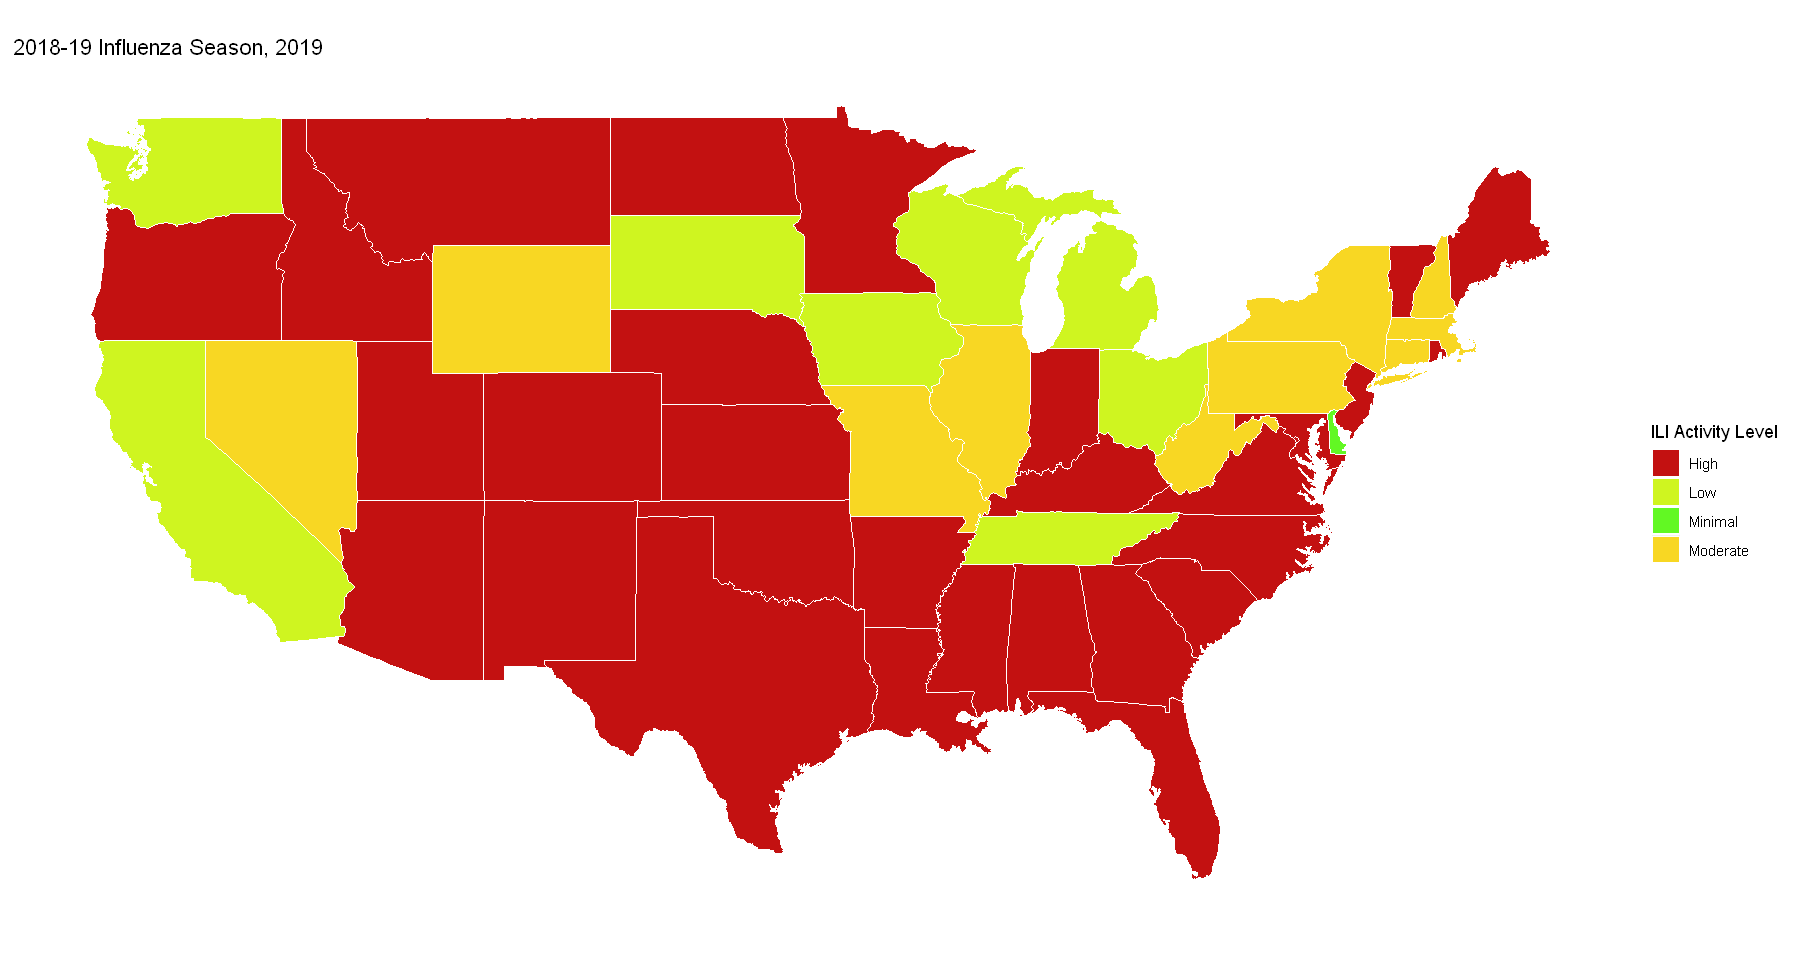

In [35]:
plot

# PART 2, TASK 5

# 1-Flu Pattern for the entire year(CLINICAL HEALTH)

In [21]:
library(ggplot2)
#provides variety of methods for transforming data before analysis
library(reshape2)
infl <- read.csv("q5b.csv",header=T)
#melt-used to transform data such that each row is unique id-variable combination
melted_infl <- melt(infl,id=c("Week"))

In [22]:
#options()-used to set various parameters that affects the way in which results are displayed(dimensions)
options(repr.plot.width=15, repr.plot.height=8)

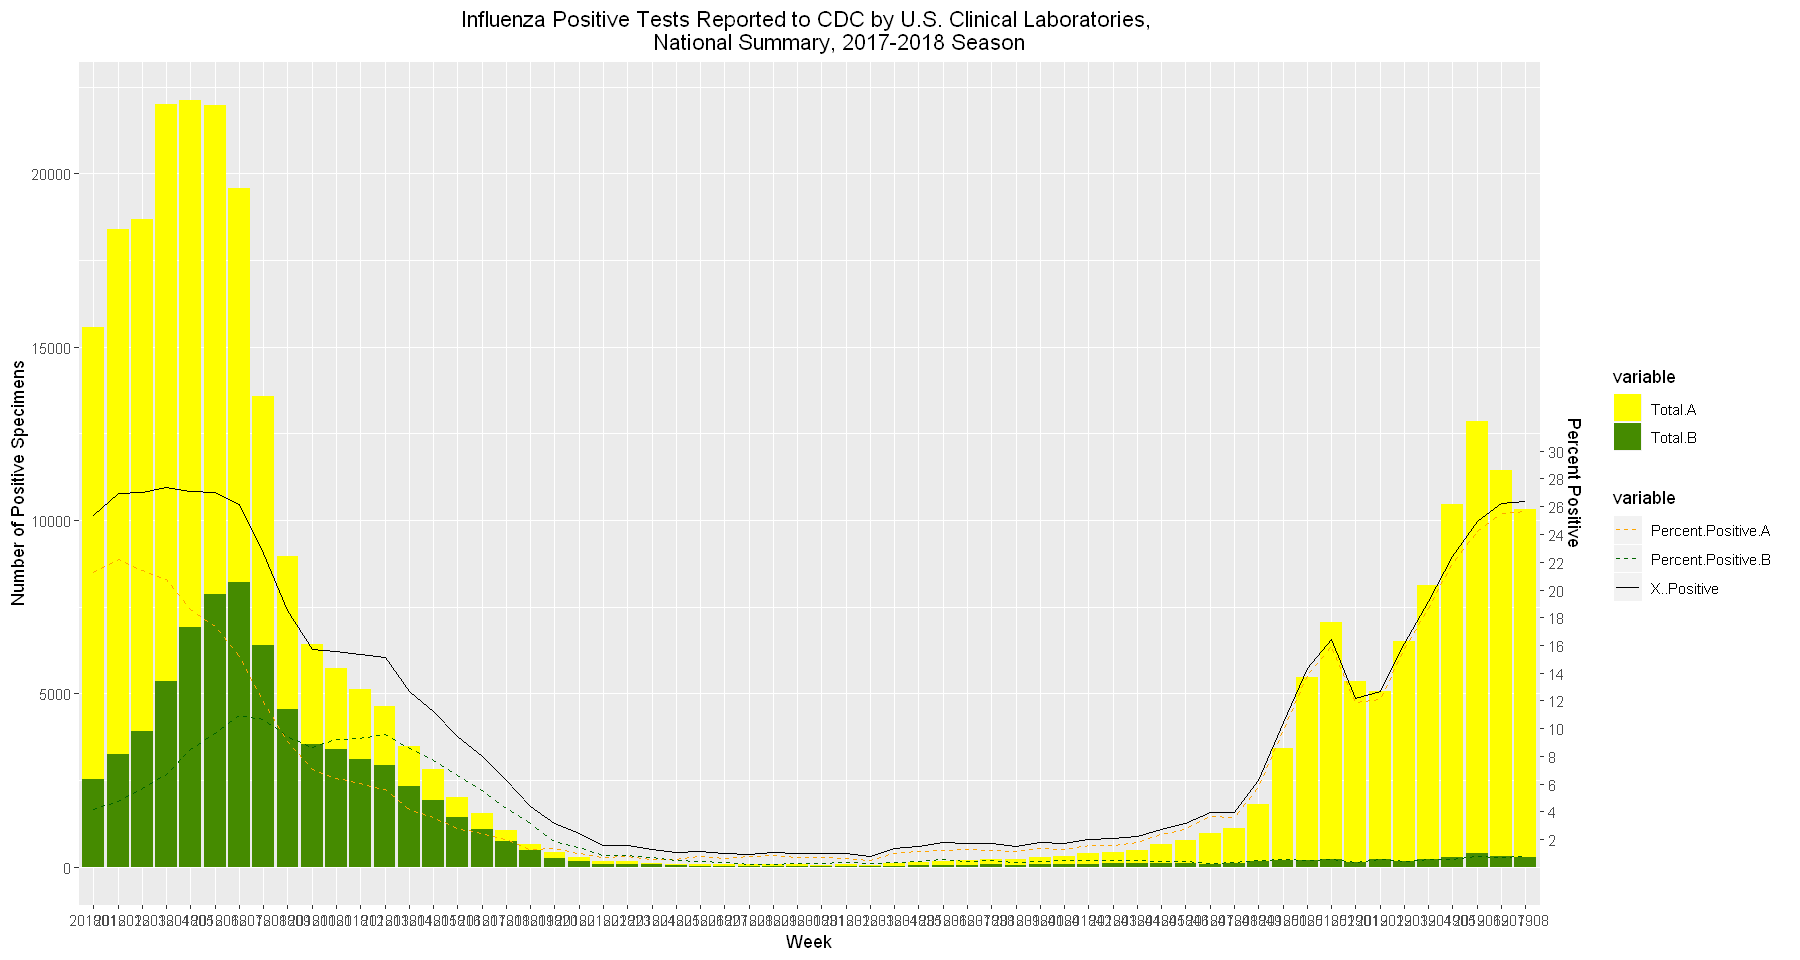

In [23]:
ggplot()+ 
geom_bar(data=subset(melted_infl,variable %in% c("Total.A","Total.B")),aes(x=factor(Week),y=value,fill=variable),stat="identity")+
scale_fill_manual(values=c("Total.A" = "yellow", "Total.B" = "chartreuse4"))+
geom_line(data=subset(melted_infl, variable %in% c("Percent.Positive.A","Percent.Positive.B","X..Positive")),
            aes(x=factor(Week),y=value*400,group=variable,colour=variable,linetype=variable))+
scale_colour_manual(values=c("Percent.Positive.A" = "orange", "Percent.Positive.B" = "darkgreen","X..Positive" = "black"))+
scale_linetype_manual(values=c("Percent.Positive.A" = "dashed", "Percent.Positive.B" = "dashed","X..Positive" = "solid"))+
scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive",breaks = round(seq(2, 30, by = 2),1)))+
labs(x="Week",y="Number of Positive Specimens")+ ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2017-2018 Season")+theme(plot.title = element_text(hjust = 0.5))

# 2-Flu Pattern for the entire year(PUBLIC HEALTH)

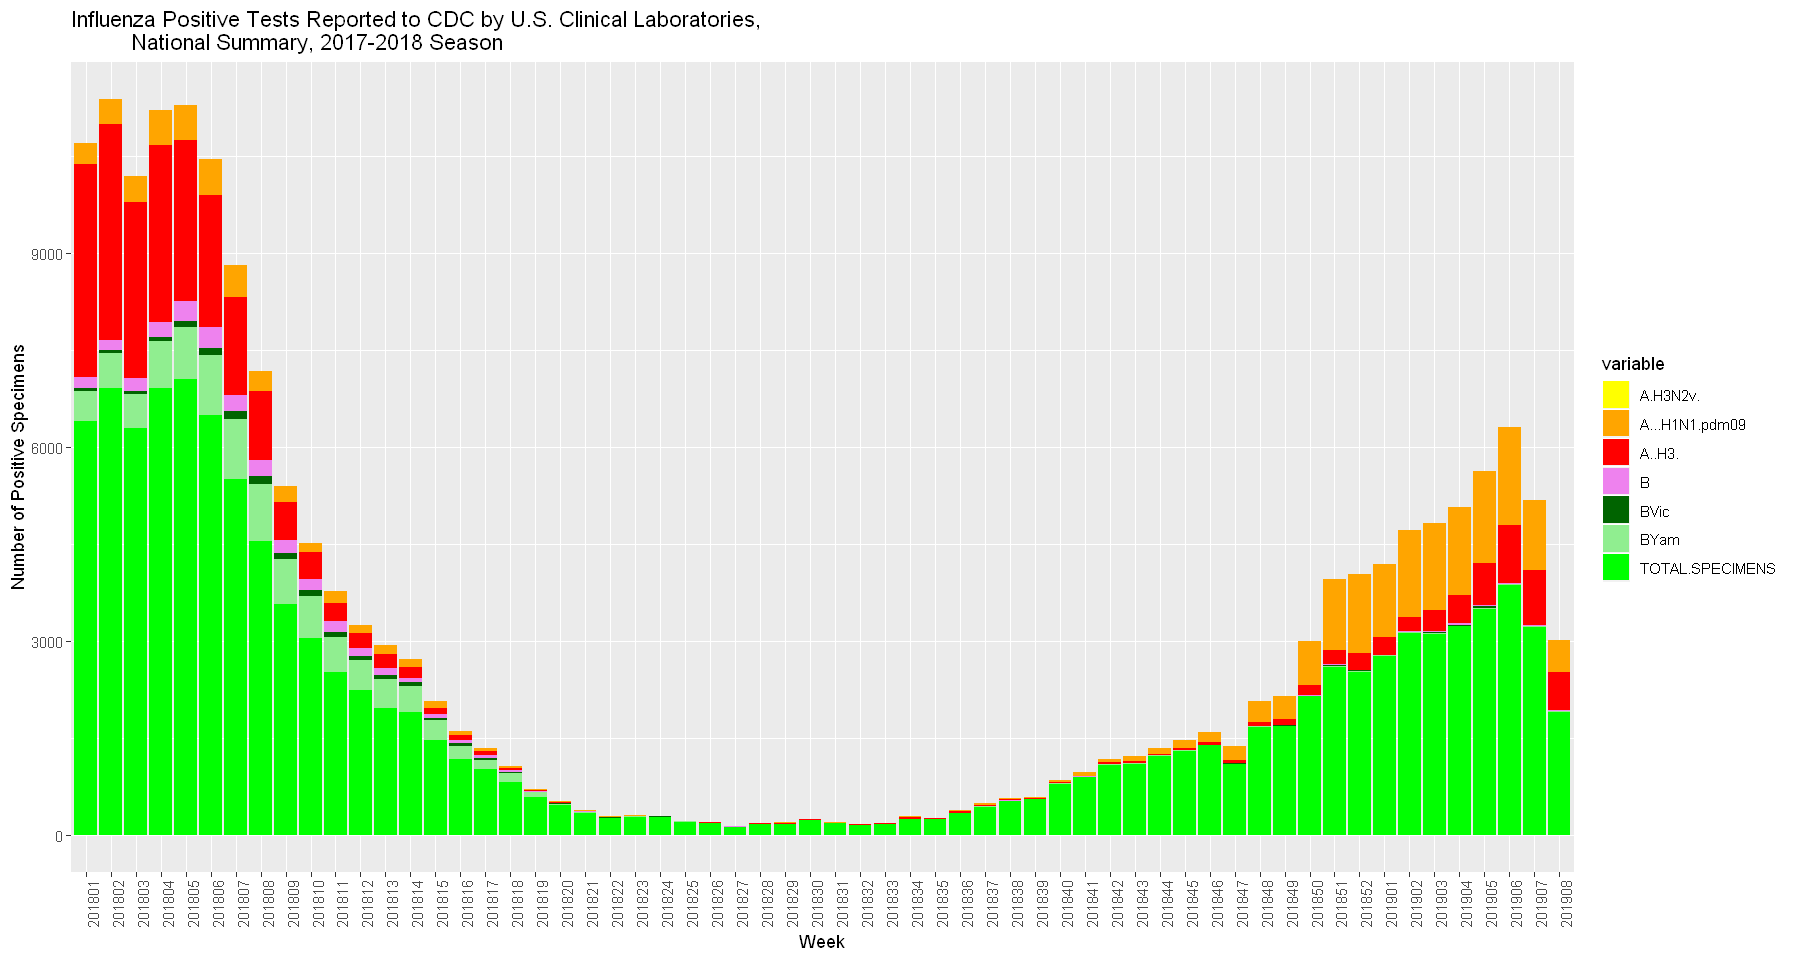

In [20]:
library(ggplot2)
library (reshape2)

data_plot_2 <- read.csv("q5a.csv", header=TRUE)
data_plot_2 <- subset( data_plot_2, select = -c(5, 10 ))
data_plot_2_melt <- melt(data_plot_2,id=c("Week"))

ggplot()+
  geom_bar(data=data_plot_2_melt,aes(x=factor(Week),y=value,fill=variable),stat="identity")+
  scale_fill_manual(values = c("yellow","orange","red","violet","darkgreen","lightgreen","green1" ))+
  labs(x="Week",y="Number of Positive Specimens")+
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2017-2018 Season")+theme(axis.text.x = element_text(angle = 90, hjust = 1))

# PART 2, TASK 6 


# Influenza tests by Clinical Laboratories for NewYork state

In [24]:
library(ggplot2)
#provides variety of methods for transforming data before analysis
library(reshape2)
infl <- read.csv("q6.csv",header=T)
#melt-used to transform data such that each row is unique id-variable combination
melted_infl <- melt(infl,id=c("Week"))

In [25]:
#options()-used to set various parameters that affects the way in which results are displayed(dimensions)
options(repr.plot.width=15, repr.plot.height=8)

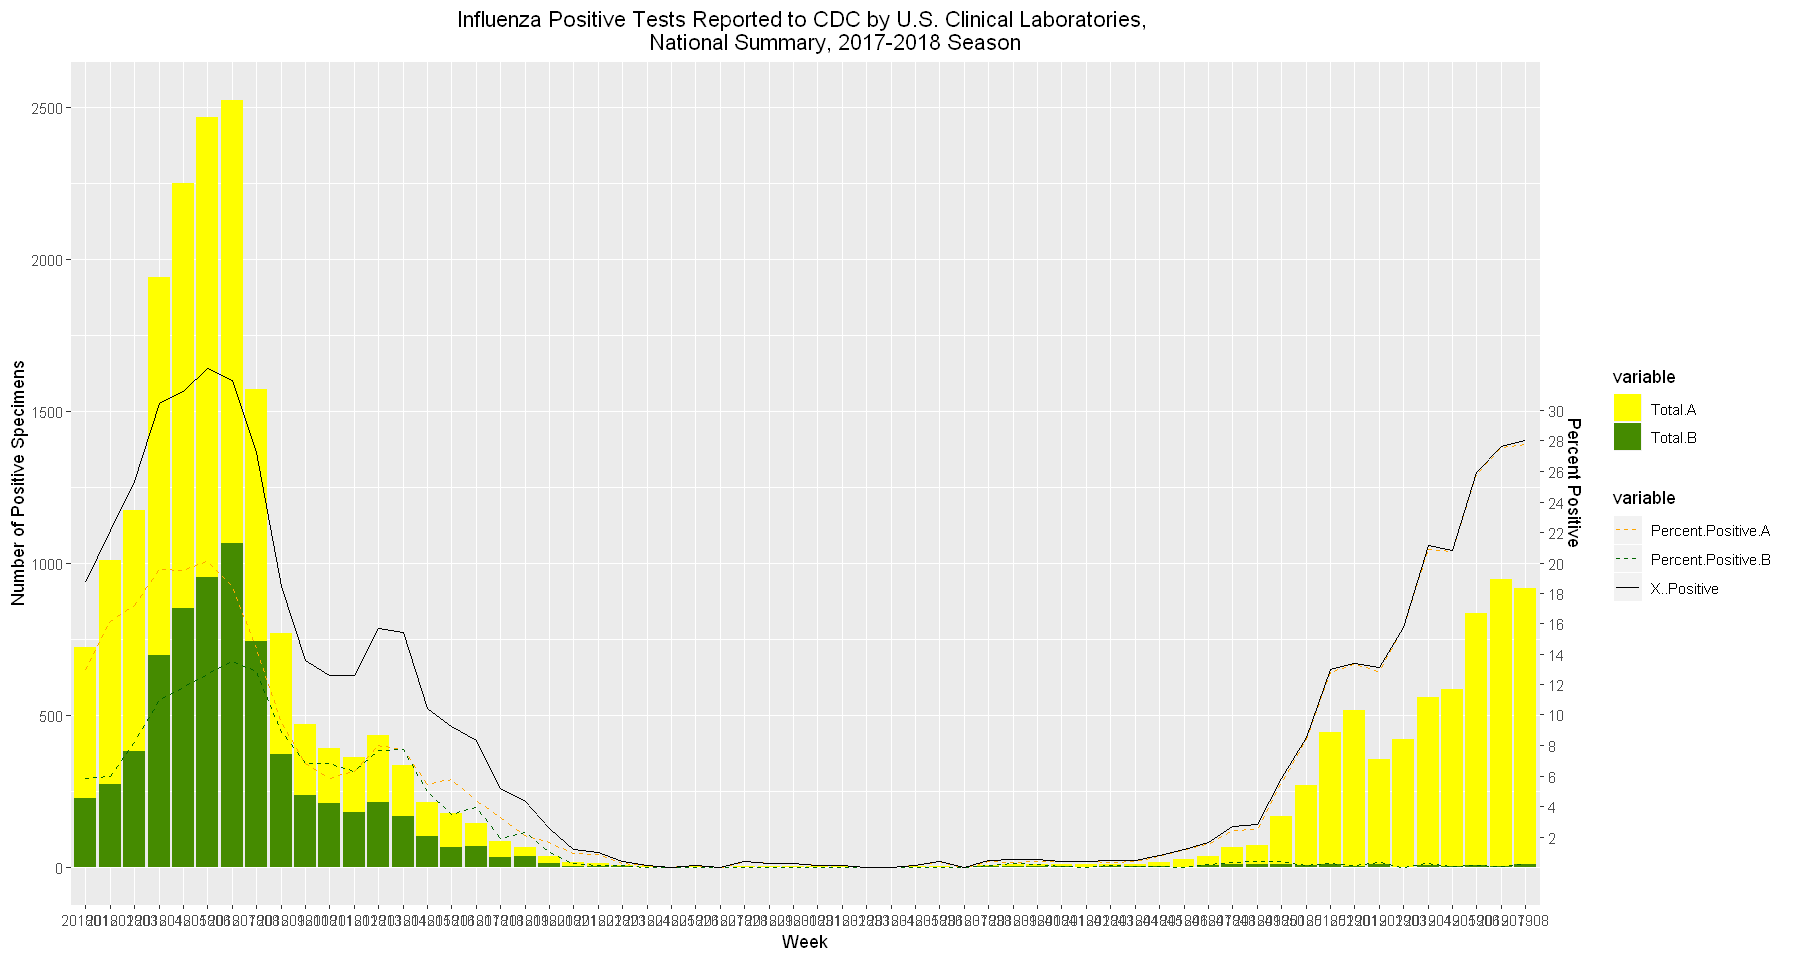

In [26]:
ggplot()+ 
geom_bar(data=subset(melted_infl,variable %in% c("Total.A","Total.B")),aes(x=factor(Week),y=value,fill=variable),stat="identity")+
scale_fill_manual(values=c("Total.A" = "yellow", "Total.B" = "chartreuse4"))+
geom_line(data=subset(melted_infl, variable %in% c("Percent.Positive.A","Percent.Positive.B","X..Positive")),
            aes(x=factor(Week),y=value*50,group=variable,colour=variable,linetype=variable))+
scale_colour_manual(values=c("Percent.Positive.A" = "orange", "Percent.Positive.B" = "darkgreen","X..Positive" = "black"))+
scale_linetype_manual(values=c("Percent.Positive.A" = "dashed", "Percent.Positive.B" = "dashed","X..Positive" = "solid"))+
#scale_y_continuous-default scales for continuous values of x and y 
scale_y_continuous(sec.axis = sec_axis(~.*0.02, name = "Percent Positive",breaks = round(seq(2, 30, by = 2),1)))+
labs(x="Week",y="Number of Positive Specimens")+ ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2017-2018 Season")+theme(plot.title = element_text(hjust = 0.5))